### import and load the dataset

In [ ]:
from google.colab import drive


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Car Sale.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.shape

### Q1. What is the average selling price of cars for each dealer and how does it compare across different dealers?

In [14]:
# Grouping by dealer name and calculating average selling price, then sorting by price
df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


### Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

### Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [15]:
# Calculating the price range (max - min) for each car brand
df.groupby('Company')['Price ($)'].agg(['min', 'max', 'mean']).assign(price_range=lambda x: x['max'] - x['min'])

,min,max,mean,price_range
Company,,,,
Acura,14000,45501,24758.561684,31501
Audi,12000,85500,22851.790598,73500
BMW,9000,69500,25090.622785,60500
Buick,12000,62801,33634.362187,50801
Cadillac,13000,85800,40972.093558,72800
Chevrolet,10000,82800,26198.606377,72800
Chrysler,12000,51800,26019.529464,39800
Dodge,10000,60851,26406.341113,50851
Ford,1200,69600,29263.682156,68400


<Axes: xlabel='Transmission', ylabel='Price ($)'>

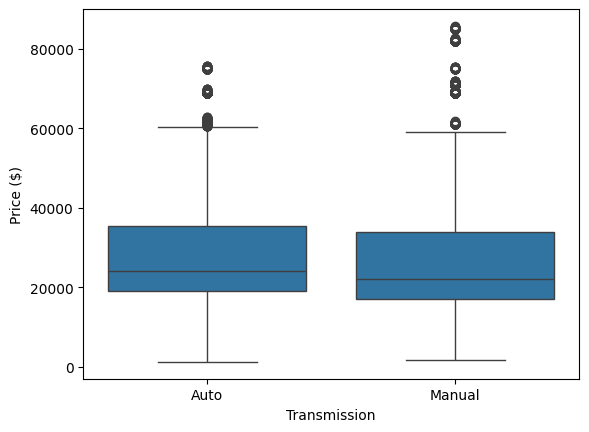

In [16]:
# Plotting boxplot for car prices by transmission type to visualize distribution and interquartile ranges
sns.boxplot(data=df, x='Transmission', y='Price ($)')

### Q4. What is the distribution of car prices across different regions?

<Axes: title={'center': 'Price ($)'}, xlabel='Dealer_Region'>

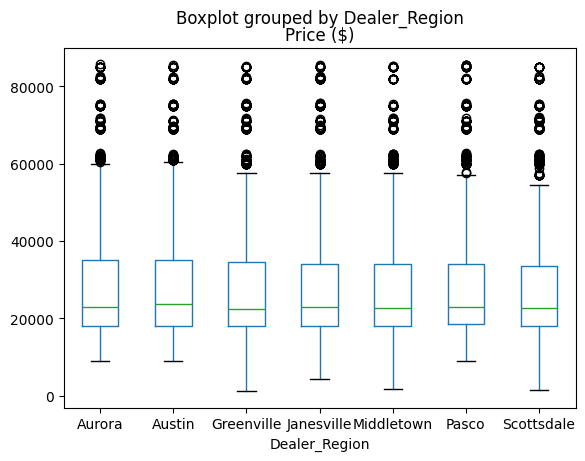

In [17]:
# Plotting the distribution of car prices across different dealer regions
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False)

### Q5. What is the distribution of cars based on body styles?

In [18]:
# Getting the count of cars by body style
df['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


### Q6. How does the average selling price of cars vary by customer gender and annual income?

In [19]:
# Grouping by gender and calculating average price and annual income
df.groupby('Gender').agg({'Price ($)': 'mean', 'Annual Income': 'mean'})

,Price ($),Annual Income
Gender,,
Female,28277.265270,755973.021339
Male,28039.429407,851184.044207


### Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

<Axes: xlabel='Dealer_Region'>

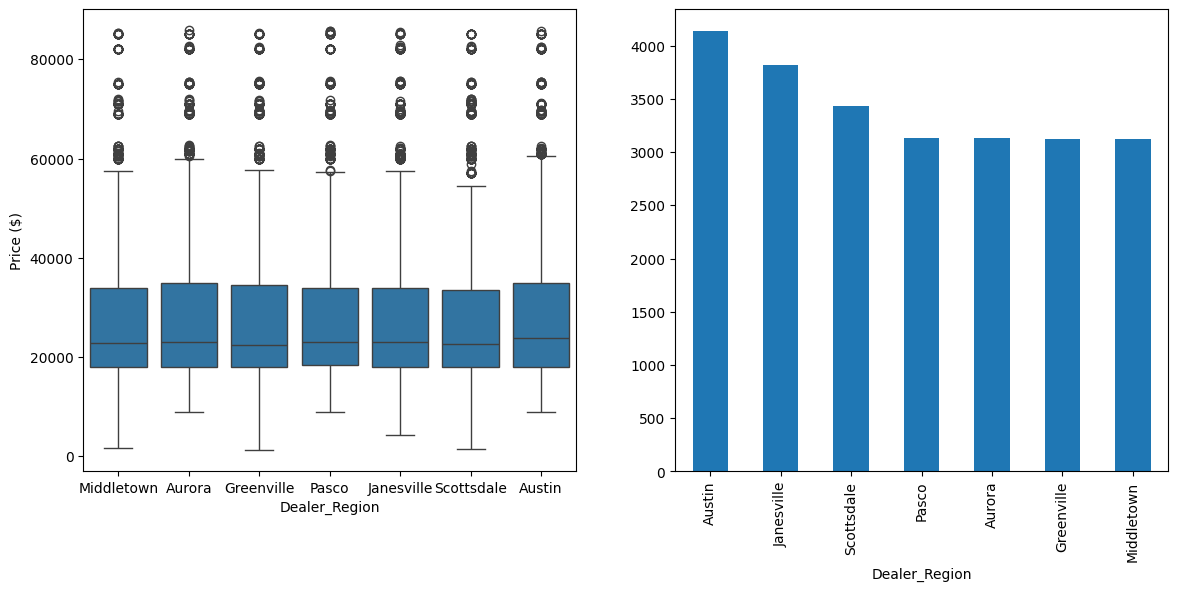

In [20]:
# Plotting distribution of car prices and counting number of cars sold by region
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', ax=ax[0])
df['Dealer_Region'].value_counts().plot(kind='bar', ax=ax[1])

### Q8. How does the average car price differ between cars with different engine sizes?

In [21]:
# Grouping by engine size and calculating average car price
df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


### Q9. How do car prices vary based on the customer’s annual income bracket?

In [22]:
# Creating income brackets and analyzing the average price within each bracket
income_bins = [0, 30000, 60000, 100000, 150000, float('inf')]
income_labels = ['0-30k', '30k-60k', '60k-100k', '100k-150k', '150k+']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)
df.groupby('Income_Bracket')['Price ($)'].mean()

<ipython-input-22-429550c38847>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income_Bracket')['Price ($)'].mean()


,Price ($)
Income_Bracket,
0-30k,27884.297820
30k-60k,NaN
60k-100k,43000.000000
100k-150k,23200.200000
150k+,28149.089557


### Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

<Axes: xlabel='Model', ylabel='Price ($)'>

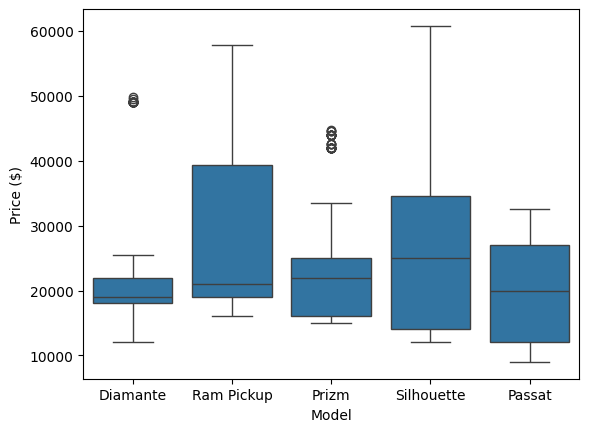

In [23]:
# Counting the number of sales per car model and plotting their price distributions
top_5_models = df['Model'].value_counts().head(5).index
sns.boxplot(data=df[df['Model'].isin(top_5_models)], x='Model', y='Price ($)')

### Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


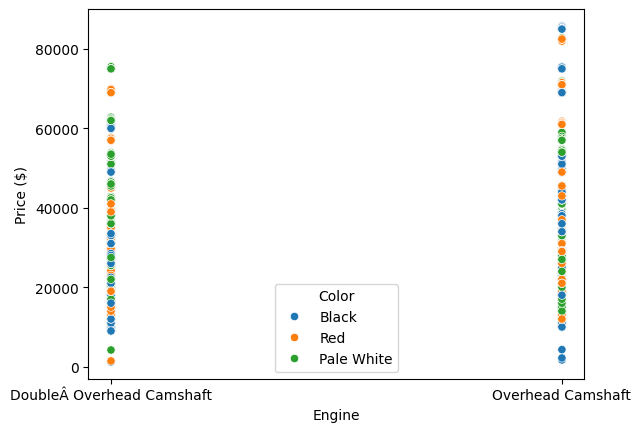

In [24]:
# Plotting engine size vs price across different car colors and calculating price variation
sns.scatterplot(data=df, x='Engine', y='Price ($)', hue='Color')
df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

### Q12. Is there any seasonal trend in car sales based on the date of sale?

<Axes: title={'center': 'Car Sales by Month'}, xlabel='Sale_Month'>

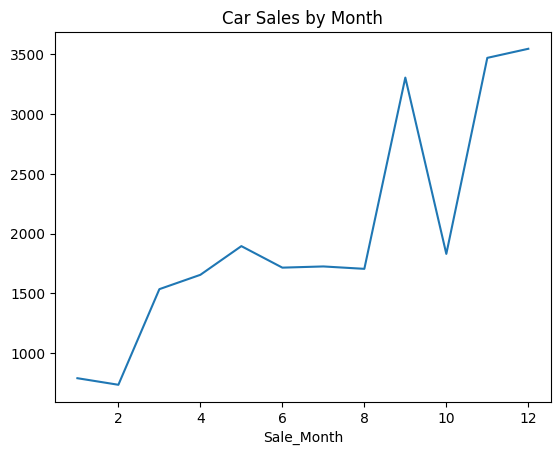

In [25]:
# Extracting month and year from the sale date and plotting the sales trend
df['Sale_Month'] = pd.to_datetime(df['Date']).dt.month
df.groupby('Sale_Month').size().plot(kind='line', title="Car Sales by Month")

### Q13. How does the car price distribution change when considering different combinations of body style and transmission type?

<Axes: xlabel='Body Style', ylabel='Price ($)'>

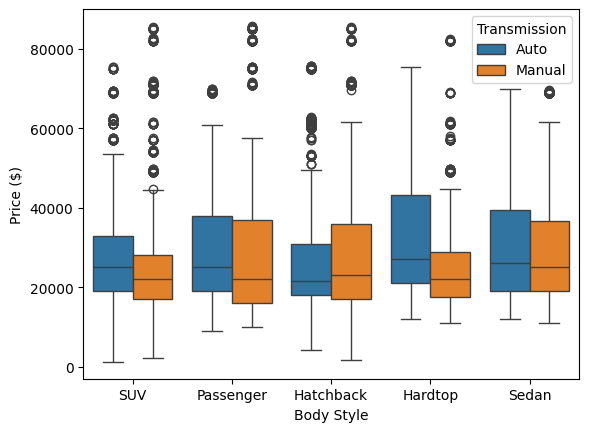

In [26]:
# Plotting boxplots for price distribution by body style and transmission type combinations
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')

### Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

### Q15. How does the average car price vary across different car models and engine types?

In [31]:
# Grouping by Gender and Dealer Region, then calculating the average car price
avg_price_by_gender_region = df.groupby(['Gender', 'Dealer_Region'])['Price ($)'].mean().unstack()

# Storing the result in a DataFrame
avg_price_df = pd.DataFrame(avg_price_by_gender_region)

# Displaying the DataFrame
avg_price_df

Dealer_Region,Aurora,Austin,Greenville,Janesville,Middletown,Pasco,Scottsdale
Gender,,,,,,,
Female,28020.487805,28151.648352,28034.741301,28787.607453,28211.312676,28684.985849,28030.356164
Male,28417.923201,28395.203411,28219.958654,27578.650531,27752.107527,27974.774749,27934.596374
